In [1]:
import pandas as pd
sddt_links = pd.read_csv('sddt_links.tsv', sep = '\t')

# Select unique rows based on "uniprot" and "idgTDL" columns
unique_rows = sddt_links[["uniprot", "idgTDL"]].drop_duplicates()

# Count the occurrences of each "idgTDL" value
tdl_counts = unique_rows.groupby("idgTDL").size().reset_index(name="N")

# Display the table
print(tdl_counts.to_markdown(index=False, headers=["idgTDL", "N"]))

| idgTDL   |   N |
|:---------|----:|
| Tbio     |  73 |
| Tchem    | 525 |
| Tclin    | 189 |
| Tdark    |   4 |


In [2]:
# Read specific columns from a CSV file
df = pd.read_csv('sddt_links.tsv', sep = '\t', usecols=['nct_id', 'disease_term', 'drug_name', 'gene_symbol'])

In [3]:
unique_counts = {
    'disease': df['disease_term'].nunique(),
    'drugs': df['drug_name'].nunique(),
    'target': df['gene_symbol'].nunique(),
    'nct-id': df['nct_id'].nunique()
}

print(unique_counts)

{'disease': 862, 'drugs': 305, 'target': 790, 'nct-id': 1424}


In [4]:
# Concatenate disease, drug, and gene into a triplet pair column
df['triplet_pair'] = df['disease_term'].fillna('') + df['drug_name'].fillna('') + df['gene_symbol'].fillna('')

# Count the occurrences of each triplet pair
triplet_pair_counts = df['triplet_pair'].value_counts()

# Count the unique nct_id for each triplet pair
triplet_nct_counts = df.groupby('triplet_pair')['nct_id'].nunique().reset_index()
triplet_nct_counts.head(5)

,triplet_pair,nct_id
0,AIDS3TCABCB11,1
1,AIDS3TCABCC2,1
2,AIDS3TCABCC3,1
3,AIDS3TCABCC4,1
4,AIDS3TCABL1,1


In [5]:
triplet_nct_counts_sorted = triplet_nct_counts.sort_values('nct_id', ascending=False)

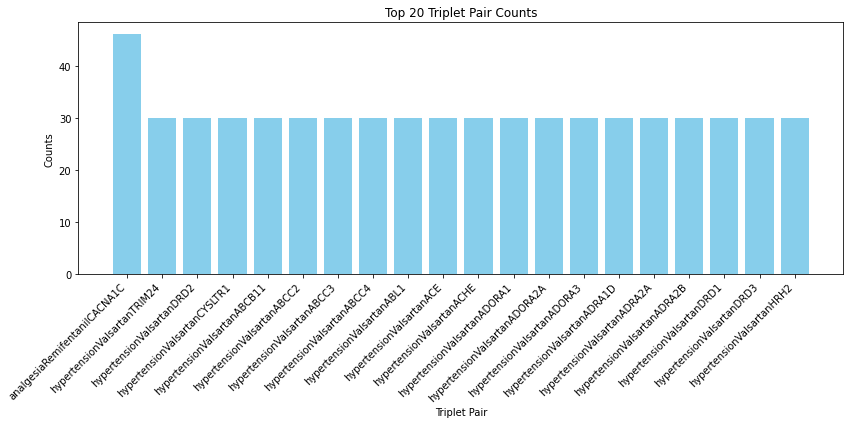

In [6]:
import matplotlib.pyplot as plt
# Assuming you have the 'triplet_nct_counts_sorted' DataFrame with 'triplet_pair' and 'counts' columns
top_20 = triplet_nct_counts_sorted.head(20)  # Select top 20 rows

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(top_20['triplet_pair'], top_20['nct_id'], color='skyblue')

# Labeling the axes
plt.xlabel('Triplet Pair')
plt.ylabel('Counts')
plt.title('Top 20 Triplet Pair Counts')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
#associations related to a drug, cisplatin

In [8]:
cisplatin_df = df[df['drug_name'] == 'cisplatin']

#Example with drug, cisplatin.

how many genes are associated with cisplatin

how many diseases are associated with cisplatin

how many studies are associated with cisplatin

In [9]:
# Filter DataFrame for cisplatin
cisplatin_df = df[df['drug_name'] == 'cisplatin']

# Number of genes associated with cisplatin
num_genes = cisplatin_df['gene_symbol'].nunique()

# Number of diseases associated with cisplatin
num_diseases = cisplatin_df['disease_term'].nunique()

# Number of studies associated with cisplatin
num_studies = cisplatin_df['nct_id'].nunique()

# Create a DataFrame with the results
output_df = pd.DataFrame({
    'Metric': ['Number of genes associated with cisplatin', 'Number of diseases associated with cisplatin', 'Number of studies associated with cisplatin'],
    'Count': [num_genes, num_diseases, num_studies]
})

# Display the output DataFrame
print(output_df)

                                         Metric  Count
0     Number of genes associated with cisplatin     96
1  Number of diseases associated with cisplatin      1
2   Number of studies associated with cisplatin      2


In [10]:
# List of unique drugs in the 'drug_name' column
unique_drugs = df['drug_name'].unique()

# Create an empty list to store the results for each drug
results = []

# Loop through each drug
for drug in unique_drugs:
    # Filter DataFrame for the current drug
    drug_df = df[df['drug_name'] == drug]

    # Number of genes associated with the current drug
    num_genes = drug_df['gene_symbol'].nunique()

    # Number of diseases associated with the current drug
    num_diseases = drug_df['disease_term'].nunique()

    # Number of studies associated with the current drug
    num_studies = drug_df['nct_id'].nunique()

    # Append the results to the list
    results.append({
        'Drug': drug,
        'Number of genes associated': num_genes,
        'Number of diseases associated': num_diseases,
        'Number of studies associated': num_studies
    })

# Create a DataFrame from the results
output_df = pd.DataFrame(results)

# Display the output DataFrame
output_df

,Drug,Number of genes associated,Number of diseases associated,Number of studies associated
0,Pyridoxal,12,7,3
1,pyridoxal,12,9,1
2,Atacand,30,7,1
3,Candesartan Cilexetil,30,2,1
4,Candesartan cilexetil,30,11,10
...,...,...,...,...
300,nepafenac,1,5,3
301,Triamcinolone,1,1,1
302,Nepafenac,1,32,14
303,Nevanac,1,1,1


from the output_df dataframe

what drug have the highest Number of genes associated with it

what drug have the highest Number of diseases associated with it

what drug have the highest Number of studies associated with it

In [11]:
# Find the drug with the highest number of genes associated
max_genes_drug = output_df.loc[output_df['Number of genes associated'].idxmax(), 'Drug']
print("Drug with the highest number of genes associated:", max_genes_drug)

# Find the drug with the highest number of diseases associated
max_diseases_drug = output_df.loc[output_df['Number of diseases associated'].idxmax(), 'Drug']
print("Drug with the highest number of diseases associated:", max_diseases_drug)

# Find the drug with the highest number of studies associated
max_studies_drug = output_df.loc[output_df['Number of studies associated'].idxmax(), 'Drug']
print("Drug with the highest number of studies associated:", max_studies_drug)

Drug with the highest number of genes associated: Cisplatin
Drug with the highest number of diseases associated: Simvastatin
Drug with the highest number of studies associated: Simvastatin


In [12]:
# List of unique drugs in the 'drug_name' column
unique_drugs = df['drug_name'].unique()

# Create an empty list to store the results for each drug
results = []

# Loop through each drug
for drug in unique_drugs:
    # Filter DataFrame for the current drug
    drug_df = df[df['drug_name'] == drug]

    # Extract genes, studies, and diseases associated with the current drug
    genes = drug_df['gene_symbol'].unique()
    studies = drug_df['nct_id'].unique()
    diseases = drug_df['disease_term'].unique()

    # Append the results to the list
    results.append({
        'Drug': drug,
        'Genes': genes,
        'Studies': studies,
        'Diseases': diseases
    })

# Create a DataFrame from the results
out_df = pd.DataFrame(results)

In [13]:
# List of unique drugs in the 'drug_name' column
unique_drugs = df['drug_name'].unique()

# Create an empty list to store the results for each drug
results = []

# Loop through each drug
for drug in unique_drugs:
    # Filter DataFrame for the current drug
    drug_df = df[df['drug_name'] == drug]

    # Extract genes, studies, and diseases associated with the current drug
    genes = drug_df['gene_symbol'].unique()
    studies = drug_df['nct_id'].unique()
    diseases = drug_df['disease_term'].unique()

    # Append the results as a dictionary
    result_dict = {
        'Drug': drug,
        'Genes': genes,
        'Studies': studies,
        'Diseases': diseases
    }
    results.append(result_dict)

# Create a DataFrame from the results
out_df = pd.DataFrame(results)

# Display the output DataFrame
out_df

,Drug,Genes,Studies,Diseases
0,Pyridoxal,"[KDM4E, PDXK, GMNN, ALDH1A1, LMNA, HPGD, APEX1...","[NCT00157716, NCT00402506, NCT00917293]","[stroke, coronary artery disease, ischemia, un..."
1,pyridoxal,"[KDM4E, PDXK, GMNN, ALDH1A1, LMNA, HPGD, APEX1...",[NCT00157729],"[hypertension, diabetes, obesity, stroke, myoc..."
2,Atacand,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...",[NCT00081731],"[hypertension, end-stage renal disease, stroke..."
3,Candesartan Cilexetil,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...",[NCT00120003],"[stroke, high blood pressure]"
4,Candesartan cilexetil,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...","[NCT00125463, NCT01012479, NCT01052272, NCT011...","[Hypertension, high blood pressure, stroke, he..."
...,...,...,...,...
300,nepafenac,[TDP1],"[NCT00494494, NCT01331005, NCT01847638]","[cataract, Diabetic Retinopathy, diabetes, ret..."
301,Triamcinolone,[TDP1],[NCT00780780],[Diabetic Retinopathy]
302,Nepafenac,[TDP1],"[NCT00780780, NCT00801905, NCT00900887, NCT013...","[Diabetic Retinopathy, diabetic retinopathy, m..."
303,Nevanac,[TDP1],[NCT01657266],[cataract]


In [14]:
df2 = pd.read_csv('aact_studies.tsv', sep ='\t')

In [15]:
# Create an empty list to store the queried values
queried_values = []

# Loop through each study IDs list in the 'Studies' column of out_df
for studies in out_df['Studies']:
    # Create an empty list to store the queried values for the current studies
    studies_queried_values = []

    # Loop through each study ID in the current studies list
    for study_id in studies:
        # Query df2 for the current study ID and retrieve the desired values
        queried_value = df2.loc[df2['nct_id'] == study_id, 'phase'].values

        # Check if a match is found
        if len(queried_value) > 0:
            studies_queried_values.append(queried_value[0])
        else:
            studies_queried_values.append(None)

    # Append the queried values for the current studies to the main list
    queried_values.append(studies_queried_values)

# Add the queried values as a new column in out_df
out_df['StudyPhase'] = queried_values

In [16]:
# Create an empty list to store the queried values
queried_values = []

# Loop through each study IDs list in the 'Studies' column of out_df
for studies in out_df['Studies']:
    # Create an empty list to store the queried values for the current studies
    studies_queried_values = []

    # Loop through each study ID in the current studies list
    for study_id in studies:
        # Query df2 for the current study ID and retrieve the desired values
        queried_value = df2.loc[df2['nct_id'] == study_id, 'overall_status'].values

        # Check if a match is found
        if len(queried_value) > 0:
            studies_queried_values.append(queried_value[0])
        else:
            studies_queried_values.append(None)

    # Append the queried values for the current studies to the main list
    queried_values.append(studies_queried_values)

# Add the queried values as a new column in out_df
out_df['StudyOverall_status'] = queried_values

In [17]:
df3 = pd.read_csv('aact_study_refs.tsv', sep = '\t')

In [18]:
df3['pmid'].nunique()

564634

how many pmids are associated with every nct_id

In [19]:
# Create an empty list to store the counts
counts = []

# Loop through each study ID in the 'Studies' column of out_df
for study_ids in out_df['Studies']:
    # Query df3 with the current study IDs and get the count of occurrences for each ID
    count = df3[df3['nct_id'].isin(study_ids)]['nct_id'].value_counts().to_dict()
    
    # Append the count to the list
    counts.append(count)

# Add the counts as a new column in out_df
out_df['nPub'] = counts

In [21]:
out_df

,Drug,Genes,Studies,Diseases,StudyPhase,StudyOverall_status,nPub
0,Pyridoxal,"[KDM4E, PDXK, GMNN, ALDH1A1, LMNA, HPGD, APEX1...","[NCT00157716, NCT00402506, NCT00917293]","[stroke, coronary artery disease, ischemia, un...","[Phase 2, Phase 3, Phase 2]","[Completed, Completed, Terminated]",{'NCT00402506': 3}
1,pyridoxal,"[KDM4E, PDXK, GMNN, ALDH1A1, LMNA, HPGD, APEX1...",[NCT00157729],"[hypertension, diabetes, obesity, stroke, myoc...",[Phase 2],[Completed],{}
2,Atacand,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...",[NCT00081731],"[hypertension, end-stage renal disease, stroke...",[Phase 3],[Completed],{'NCT00081731': 10}
3,Candesartan Cilexetil,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...",[NCT00120003],"[stroke, high blood pressure]",[Phase 3],[Completed],{'NCT00120003': 9}
4,Candesartan cilexetil,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...","[NCT00125463, NCT01012479, NCT01052272, NCT011...","[Hypertension, high blood pressure, stroke, he...","[Phase 3, Phase 4, Phase 2/Phase 3, Phase 3, P...","[Unknown status, Completed, Completed, Complet...","{'NCT01052272': 39, 'NCT00125463': 2, 'NCT0113..."
...,...,...,...,...,...,...,...
300,nepafenac,[TDP1],"[NCT00494494, NCT01331005, NCT01847638]","[cataract, Diabetic Retinopathy, diabetes, ret...","[Phase 4, Phase 2, Not Applicable]","[Completed, Completed, Completed]","{'NCT01847638': 1, 'NCT01331005': 1}"
301,Triamcinolone,[TDP1],[NCT00780780],[Diabetic Retinopathy],[Phase 3],[Completed],{}
302,Nepafenac,[TDP1],"[NCT00780780, NCT00801905, NCT00900887, NCT013...","[Diabetic Retinopathy, diabetic retinopathy, m...","[Phase 3, Phase 2, Phase 2, Phase 4, Phase 4, ...","[Completed, Unknown status, Completed, Complet...","{'NCT05542381': 19, 'NCT02084576': 4, 'NCT0244..."
303,Nevanac,[TDP1],[NCT01657266],[cataract],[Phase 2],[Completed],{}


In [23]:
df3

,id,nct_id,reference_type,pmid,citation
0,29790838,NCT02597933,derived,33328257.0,"Roennow A, Sauve M, Welling J, Riggs RJ, Kenne..."
1,29790839,NCT02597933,derived,33223487.0,"Azuma A, Chung L, Behera D, Chung M, Kondoh Y,..."
2,29790840,NCT02597933,derived,33142016.0,"Maher TM, Mayes MD, Kreuter M, Volkmann ER, Ar..."
3,29802311,NCT05054257,background,26958506.0,"Zhao S, Jiang E, Chen S, Gu Y, Shangguan AJ, L..."
4,29640647,NCT03667131,background,22318811.0,"Park S, Lakatta EG. Role of inflammation in th..."
...,...,...,...,...,...
788729,29790833,NCT02597933,derived,35790961.0,"Maher TM, Bourdin A, Volkmann ER, Vettori S, D..."
788730,29790834,NCT02597933,derived,35640959.0,"Kreuter M, Hoffmann-Vold AM, Matucci-Cerinic M..."
788731,29790835,NCT02597933,derived,35150246.0,"Volkmann ER, Kreuter M, Hoffmann-Vold AM, Wijs..."
788732,29790836,NCT02597933,derived,35012623.0,"Kreuter M, Del Galdo F, Miede C, Khanna D, Wuy..."


In [26]:
df3['reference_type'].unique()

array(['derived', 'background', 'result'], dtype=object)

In [27]:
# Create a list of study IDs
study_ids = ['NCT00157716', 'NCT00402506', 'NCT00917293']

# Query df3 with the study IDs and retrieve the reference types
reference_types = df3.loc[df3['nct_id'].isin(study_ids), 'reference_type']
# Display the result
reference_types

120011    background
120012       derived
120013       derived
Name: reference_type, dtype: object

In [29]:
# Create an empty list to store the reference types
reference_types = []

# Loop through each study IDs list in the 'Studies' column of out_df
for study_ids in out_df['Studies']:
    # Create an empty list to store the reference types for the current studies
    studies_reference_types = []
    
    # Loop through each study ID in the current studies list
    for study_id in study_ids:
        # Query df3 with the current study ID and retrieve the reference type
        reference_type = df3.loc[df3['nct_id'] == study_id, 'reference_type'].values
        
        # Append the reference type to the list
        studies_reference_types.append(reference_type[0] if len(reference_type) > 0 else None)
    
    # Append the reference types for the current studies to the main list
    reference_types.append(studies_reference_types)

# Add the reference types as a new column in out_df
out_df['nPubTypes'] = reference_types

# Display the updated out_df DataFrame
out_df

,Drug,Genes,Studies,Diseases,StudyPhase,StudyOverall_status,nPub,Reference Type,nPubTypes
0,Pyridoxal,"[KDM4E, PDXK, GMNN, ALDH1A1, LMNA, HPGD, APEX1...","[NCT00157716, NCT00402506, NCT00917293]","[stroke, coronary artery disease, ischemia, un...","[Phase 2, Phase 3, Phase 2]","[Completed, Completed, Terminated]",{'NCT00402506': 3},"[None, background, None]","[None, background, None]"
1,pyridoxal,"[KDM4E, PDXK, GMNN, ALDH1A1, LMNA, HPGD, APEX1...",[NCT00157729],"[hypertension, diabetes, obesity, stroke, myoc...",[Phase 2],[Completed],{},[None],[None]
2,Atacand,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...",[NCT00081731],"[hypertension, end-stage renal disease, stroke...",[Phase 3],[Completed],{'NCT00081731': 10},[background],[background]
3,Candesartan Cilexetil,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...",[NCT00120003],"[stroke, high blood pressure]",[Phase 3],[Completed],{'NCT00120003': 9},[derived],[derived]
4,Candesartan cilexetil,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...","[NCT00125463, NCT01012479, NCT01052272, NCT011...","[Hypertension, high blood pressure, stroke, he...","[Phase 3, Phase 4, Phase 2/Phase 3, Phase 3, P...","[Unknown status, Completed, Completed, Complet...","{'NCT01052272': 39, 'NCT00125463': 2, 'NCT0113...","[background, None, background, derived, None, ...","[background, None, background, derived, None, ..."
...,...,...,...,...,...,...,...,...,...
300,nepafenac,[TDP1],"[NCT00494494, NCT01331005, NCT01847638]","[cataract, Diabetic Retinopathy, diabetes, ret...","[Phase 4, Phase 2, Not Applicable]","[Completed, Completed, Completed]","{'NCT01847638': 1, 'NCT01331005': 1}","[None, result, derived]","[None, result, derived]"
301,Triamcinolone,[TDP1],[NCT00780780],[Diabetic Retinopathy],[Phase 3],[Completed],{},[None],[None]
302,Nepafenac,[TDP1],"[NCT00780780, NCT00801905, NCT00900887, NCT013...","[Diabetic Retinopathy, diabetic retinopathy, m...","[Phase 3, Phase 2, Phase 2, Phase 4, Phase 4, ...","[Completed, Unknown status, Completed, Complet...","{'NCT05542381': 19, 'NCT02084576': 4, 'NCT0244...","[None, None, None, None, None, result, backgro...","[None, None, None, None, None, result, backgro..."
303,Nevanac,[TDP1],[NCT01657266],[cataract],[Phase 2],[Completed],{},[None],[None]


In [30]:
out_df.drop(['Reference Type'], axis = 1)

,Drug,Genes,Studies,Diseases,StudyPhase,StudyOverall_status,nPub,nPubTypes
0,Pyridoxal,"[KDM4E, PDXK, GMNN, ALDH1A1, LMNA, HPGD, APEX1...","[NCT00157716, NCT00402506, NCT00917293]","[stroke, coronary artery disease, ischemia, un...","[Phase 2, Phase 3, Phase 2]","[Completed, Completed, Terminated]",{'NCT00402506': 3},"[None, background, None]"
1,pyridoxal,"[KDM4E, PDXK, GMNN, ALDH1A1, LMNA, HPGD, APEX1...",[NCT00157729],"[hypertension, diabetes, obesity, stroke, myoc...",[Phase 2],[Completed],{},[None]
2,Atacand,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...",[NCT00081731],"[hypertension, end-stage renal disease, stroke...",[Phase 3],[Completed],{'NCT00081731': 10},[background]
3,Candesartan Cilexetil,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...",[NCT00120003],"[stroke, high blood pressure]",[Phase 3],[Completed],{'NCT00120003': 9},[derived]
4,Candesartan cilexetil,"[KDM4E, UBE2C, ALOX15B, USP2, USP1, GBA, TP53,...","[NCT00125463, NCT01012479, NCT01052272, NCT011...","[Hypertension, high blood pressure, stroke, he...","[Phase 3, Phase 4, Phase 2/Phase 3, Phase 3, P...","[Unknown status, Completed, Completed, Complet...","{'NCT01052272': 39, 'NCT00125463': 2, 'NCT0113...","[background, None, background, derived, None, ..."
...,...,...,...,...,...,...,...,...
300,nepafenac,[TDP1],"[NCT00494494, NCT01331005, NCT01847638]","[cataract, Diabetic Retinopathy, diabetes, ret...","[Phase 4, Phase 2, Not Applicable]","[Completed, Completed, Completed]","{'NCT01847638': 1, 'NCT01331005': 1}","[None, result, derived]"
301,Triamcinolone,[TDP1],[NCT00780780],[Diabetic Retinopathy],[Phase 3],[Completed],{},[None]
302,Nepafenac,[TDP1],"[NCT00780780, NCT00801905, NCT00900887, NCT013...","[Diabetic Retinopathy, diabetic retinopathy, m...","[Phase 3, Phase 2, Phase 2, Phase 4, Phase 4, ...","[Completed, Unknown status, Completed, Complet...","{'NCT05542381': 19, 'NCT02084576': 4, 'NCT0244...","[None, None, None, None, None, result, backgro..."
303,Nevanac,[TDP1],[NCT01657266],[cataract],[Phase 2],[Completed],{},[None]


 nDiseaseMention : Disease mention count for disease-target association.
 nDrugMention : Drug mention count for disease-target association.
 nDrug : Drug count for disease-target association.

Evidence variables:

    nStudy : Study count for association.
    nStudyNewness : Study count weighted by newness of study (newer better).
    nStudyPhase : Study count weighted by phase of study (completed better).
    nPub : Study publications.
    nPubTypes : Study publications (results better).
    nDiseaseMention : Disease mention count for disease-target association.
    nDrugMention : Drug mention count for disease-target association.
    nDrug : Drug count for disease-target association.
    nAssay : Assay count for drug-target association.
    nAssayPchembl : Assay count for drug-target association, weighted by pChembl.

disease-target association
    nDiseaseMention_aact - Disease mention count (in AACT)
    nDiseaseMention_pubmed - Disease mention count (in papers)
    nDrugMention_aact - Drug mention count (in AACT)
    nDrugMention_pubmed - Drug mention count (in papers)
    nDrug - Drug count